# Desafio

### **Atividade 1:**

Implementar um script utilizando a linguagem Python e seu pacote tweepy para coletar um conjunto de tweets no idioma português por meio de API do Twitter. Opcionalmente você pode salvar os tweets coletados em um arquivo csv ou json, ou ainda em um banco de dado MongoDB. Para coletar os tweets devem ser usadas as seguintes configurações:

a) Palavras chave e/ou hashtags: *'home office'* ou *'trabalho remoto'* ou *#homeoffice* ou *#trabalhoremoto*.

b) Texto completo do tweet com 280 caracteres. (*tweet_mode='extended'*).

c) Quantidade de tweets coletados: 18000.

d) Tweets mais populares (*result_type="popular"*).

**Observação 1:** Deve-se ter uma conta no Twitter com acesso de desenvolvedor. Além de criar sua aplicação e gerar as credenciais de acesso. (Vide Trabalho Prático)

**Observação 2:** A API free só permite recuperar os tweets dos últimos 7 dias e limita o número de tweets recuperados a 100 tweets por chamada, apesar de definirmos o número para 18000, não teremos este número de tweets. (Detalhes na aula interativa)

In [1]:
# Importando as bibliotecas
import os #funções do sistema operacional
import time #funções de manipulação temporal
import json #manipulação de arquivos em formato JSON
import numpy as np #processamento numérico
import pandas as pd #análise de dados em formato de séries (uma coluna) ou dataframes (uma tabela)
import tweepy #manipulação da API do Twitter
import pymongo #manipulação de bancos de dados MongoDB

In [2]:
# Definindo as chaves de autenticação
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
# Registrando as chaves
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

'''
Parâmetros API:
auth: objeto de autenticação com as chaves
wait_on_rate_limit: aguardar ou não automaticamente a reposição dos limites da taxa
wait_on_rate_limit_notify: imprimir ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites da taxa 
retry_count: número de tentativas quando ocorrer um erro
retry_delay: número de segundos de intervalo entre cada tentativa
'''
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=5, retry_delay=10)
# api = tweepy.API(auth)

In [4]:
keyword = ('homeoffice OR trabalhoremoto')
# keyword = ('#homeoffice OR #trabalhoremoto')

In [5]:
# Definindo as listas
tweets = [] #textos dos tweets
info = [] #tweets completos

In [6]:
num_tweets = 18000

tweets_api = api.search(q=keyword, count=num_tweets, tweet_mode='extended', result_type='popular', lang='pt')

# for tweet in tweepy.Cursor(api.search, q=keyword, tweet_mode='extended', rpp=num_tweets, result_type='popular', lang='pt').items(num_tweets):
for tweet in tweets_api:
    if 'retweeted_status' in dir(tweet):
        aux = tweet.retweeted_status.full_text
    else:
        aux = tweet.full_text
    
    newtweet = aux.replace("\n", " ")

    tweets.append(newtweet) #apenas o texto do tweet
    info.append(tweet) #todas as informações do tweet

    # Salvando apenas os textos num arquivo txt
    filename = 'desafio_modulo2_atividade1_texto_tweets.txt'
    path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
    file_path = os.path.join(path, filename)

    file = open(file_path, "a", -1, "utf-8")
    file.write(newtweet + '\n')
    file.close()

print(f"Total de tweets coletados: {len(info)}")

Total de tweets coletados: 4


In [7]:
# Apresentando o primeiro tweet coletado
print("Usuário: %s" % {info[0].user.screen_name})
print("Tweet: %s" % {info[0].full_text}) #no caso da busca em tweet_mode='extended'

Usuário: {'gabrielabilo1'}
Tweet: {'Uma foto boa é boa independente do seu tempo. Quando vi o filho do Maia brincando embaixo da mesa, me veio a família que tem gerações na política, o homeoffice, a pandemia. Na hora de fotografar não abre a bibliografia de referências, mas claro que ela está no fundo da mente. (+) https://t.co/z7qdUpMq4i'}


In [8]:
# Salvando os tweets coletados num arquivo json
filename = 'desafio_modulo2_atividade1_tweets.json'
path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
file_path = os.path.join(path, filename)

with open(file_path, 'a', encoding='utf-8') as file_object:
    for tweet in info:
        status = tweet

        # Convertendo para string
        json_str = json.dumps(status._json)

        # Deserializando a string para um objeto Python do tipo dict
        parsed = json.loads(json_str)

        # Gravando o tweet deserializado no arquivo
        json.dump(parsed, file_object, ensure_ascii=False, sort_keys=True, indent=4, separators=(',', ':'))
        
        # Quebra de linha ao final
        file_object.write('\n')

In [9]:
# Trnasformando os tweets num dataframe do pandas
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])

tweets_df['Len'] = np.array([len(tweet) for tweet in tweets])
tweets_df['ID'] = np.array([tweet.id for tweet in info])
tweets_df['User'] = np.array([tweet.user.screen_name for tweet in info])
tweets_df['UserName'] = np.array([tweet.user.name for tweet in info])
tweets_df['UserLocation'] = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes'] = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets'] = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo'] = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates'] = np.array([tweet.coordinates for tweet in info])
tweets_df['Place'] = np.array([tweet.place for tweet in info])

# Salvando o dataframe num arquivo csv
filename = 'desafio_modulo2_atividade1_tweets.csv'
path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
file_path = os.path.join(path, filename)
tweets_df.to_csv(file_path)

In [10]:
# Armazenando os tweets coletados num banco de dados MongoDB

# Conectando ao banco de dados
con = pymongo.MongoClient('localhost', 27017)

# Selecionando o banco de dados
db = con.twitterdb

# Selecionando a coleção para armazenar os tweets
collection = db.tweets_homeoffice

# Armazenando cada tweet
for tweet in info:
    collection.insert_one(tweet._json)

**Atividade 2:**

Utilizando a linguagem Python e os tweets coletados na atividade anterior, implementar no script anterior ou criar um novo script, uma análise de sentimento para visualizar as seguintes análises:
- Tweets mais curtidos e tweets mais retweetados (compartilhados).
- Identificar a fonte de origem (dispositivo) dos tweets.
- Realizar a análise de polaridades dos tweets, categorizando-os como positivo, negativo e neutro, sendo um tweet que represente sentimento positivo (polaridade > 0), negativo (polaridade < 0) ou neutro (polaridade = 0).
- Criar uma nuvem de palavras com as palavras mais frequentes.
- Avaliar o volume de tweets publicados por data.
- Criar um mapa de calor dos tweets utilizando a localização declarada pelos usuários.

**Observação 1:** Aprenderemos na 2ª Aula Interativa como fazer cada um deste itens.

In [11]:
# Importando as bibliotecas
from datetime import datetime #funções de manipulação de data/hora
from unidecode import unidecode #funções para manipulação de caracteres com acento
import warnings #funções de manipulação de alertas de execução de códigos
import matplotlib.pyplot as plt #funções gráficas
from textblob import TextBlob as tb #análise de polaridade de textos
from googletrans import Translator #funções relacionadas a tradução
from wordcloud import WordCloud #funções de criação de nuvem de palavras
from geopy.geocoders import Nominatim #funções de localização
import folium #funções de mapas
from folium import plugins #plugins da biblioteca folium

Tweets mais curtidos e tweets mais retweetados (compartilhados)

In [12]:
# Buscando o maior número de curtidas
count_likes_max = tweets_df['Likes'].max()
id_likes_max = tweets_df[tweets_df['Likes'] == count_likes_max].index[0]

# Apresentando o tweet e o número
print(f"O tweet com mais curtidas (likes) é: \n{tweets_df['Tweets'][id_likes_max]}")
print('\n')
print(f"Número de curtidas: {count_likes_max}")

O tweet com mais curtidas (likes) é: 
Uma foto boa é boa independente do seu tempo. Quando vi o filho do Maia brincando embaixo da mesa, me veio a família que tem gerações na política, o homeoffice, a pandemia. Na hora de fotografar não abre a bibliografia de referências, mas claro que ela está no fundo da mente. (+) https://t.co/z7qdUpMq4i


Número de curtidas: 1759


In [13]:
# Buscando o maior número de retweets (compartilhamentos)
count_retweets_max = tweets_df['Retweets'].max()
id_retweets_max = tweets_df[tweets_df['Retweets'] == count_retweets_max].index[0]

# Apresentando o tweet e o número
print(f"O tweet com mais curtidas (likes) é: \n{tweets_df['Tweets'][id_retweets_max]}")
print('\n')
print(f"Número de curtidas: {count_retweets_max}")

O tweet com mais curtidas (likes) é: 
Uma foto boa é boa independente do seu tempo. Quando vi o filho do Maia brincando embaixo da mesa, me veio a família que tem gerações na política, o homeoffice, a pandemia. Na hora de fotografar não abre a bibliografia de referências, mas claro que ela está no fundo da mente. (+) https://t.co/z7qdUpMq4i


Número de curtidas: 95


Identificar a fonte de origem (dispositivo) dos tweets

In [14]:
# Identificando a fonte dos tweets

# Armazenando os diferentes tipos de fontes
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

# Contabilizando o número de tweets por tipo de fonte 
percent = np.zeros(len(sources))
for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1

# Transformando o tipos e quantidades de cada fonte num dataframe do pandas
source_df = pd.DataFrame({'source': percent}, index=sources)

# Apresentando o dataframe gerado
source_df

,source
Twitter for Android,1.0
Hootsuite Inc.,2.0
Twitter Web App,1.0


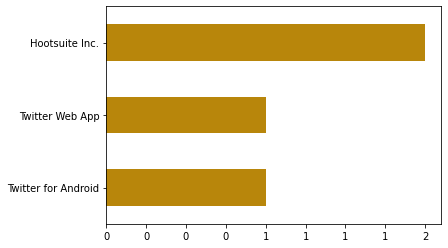

In [15]:
# Visualizando o número de tweets por fonte num gráfico de barras 
source_sorted = source_df.sort_values('source', ascending=True)
ax = source_sorted['source'].plot(kind='barh', color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Realizar a análise de polaridades dos tweets, categorizando-os como positivo, negativo e neutro, sendo um tweet que represente sentimento positivo (polaridade > 0), negativo (polaridade < 0) ou neutro (polaridade = 0)

In [16]:
# Calculando a polaridade dos tweets
analysis = None
polarities = []

for tweet in tweets_df['Tweets']:
    # Retirando os acentos das palavras
    textPT = unidecode(tweet)
    print(f'** Tweet em português: {textPT}')
    print('\n')

    # Traduzindo para o Inglês
    textEN = Translator().translate(textPT)
    print(f'** Tweet traduzido: {textEN.text}')
    print('\n')

    # Calculando a polaridade dos textos traduzidos
    analysis = tb(textEN.text)
    polarity = analysis.sentiment.polarity
    polarities.append(polarity)

** Tweet em português: Uma foto boa e boa independente do seu tempo. Quando vi o filho do Maia brincando embaixo da mesa, me veio a familia que tem geracoes na politica, o homeoffice, a pandemia. Na hora de fotografar nao abre a bibliografia de referencias, mas claro que ela esta no fundo da mente. (+) https://t.co/z7qdUpMq4i


** Tweet traduzido: A good, good shot regardless of your time. When I saw the son of Maia playing under the table, I came family that has generations in politics, the homeoffice the pandemic. At the time of shooting does not open the bibliography of references, but of course it is in the mind. (+) Https://t.co/z7qdUpMq4i


** Tweet em português: Com novos habitos, como #homeoffice, #delivery e #ecommerce, ganhamos horas, antes passadas no transito, em lojas, cozinhando ou em restaurantes. O que estamos fazendo com esta oportunidade de escolher o que e importante para nos? #ricam #ricardoamorim #mentoriaricardoamorim https://t.co/w1Oa4Ige06


** Tweet traduzido: 

In [17]:
# Apresentando os índices de polaridade de cada tweet
print('Polaridades:', polarities)

Polaridades: [0.4666666666666666, 0.14545454545454548, 0.0, 0.34]


In [18]:
# Apresentando a média das polaridades
print(f'Média de sentimentos: {np.mean(polarities)}') #a função mean() pertence ao pacote numpy

Média de sentimentos: 0.23803030303030304


In [19]:
# Contabilizando os tipos de polaridades de cada tweet coletado
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive += 1
    elif polarity < 0:
        negative += 1
    else:
        neutral += 1

print(f'Tweets Positivos: {positive}')
print(f'Tweets Negativos: {negative}')
print(f'Tweets Neutros: {neutral}')

Tweets Positivos: 3
Tweets Negativos: 0
Tweets Neutros: 1


In [20]:
# Calculando as porcentagens das polaridades e armazenando numa estrutura Series do pandas
pos_pct = positive * 100 / len(polarities)
neg_pct = negative * 100 / len(polarities)
neu_pct = neutral * 100 / len(polarities)

sentiments = ['Positivos', 'Negativos', 'Neutros']
percents = [pos_pct, neg_pct, neu_pct]

pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos')

<AxesSubplot:title={'center':'Análise de Sentimentos dos Tweets Coletados'}, ylabel='Sentimentos'>

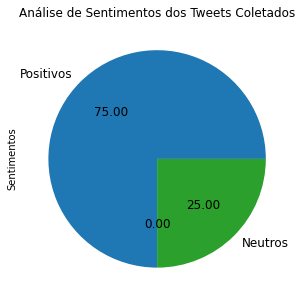

In [21]:
# Visualizando as porcentagens dos sentimentos num gráfico de pizza normal
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5), title='Análise de Sentimentos dos Tweets Coletados')

<AxesSubplot:title={'center':'Análise de Sentimentos dos Tweets Coletados'}, ylabel='Sentimentos'>

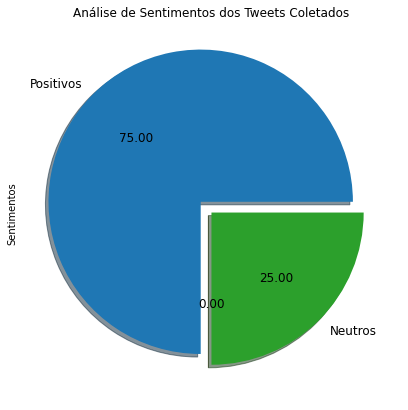

In [22]:
# Visualizando as porcentagens dos sentimentos num gráfico de pizza com destaque do maior valor
explode = (0.1, 0, 0) #0.1 seria a distância do maior valor de polaridade para o restante

pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f', shadow=True, figsize=(7, 7), title='Análise de Sentimentos dos Tweets Coletados')

Criar uma nuvem de palavras com as palavras mais frequentes

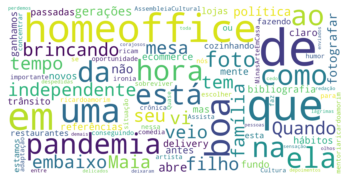

In [23]:
# Juntando todos os tweets
words = ' '.join(tweets_df['Tweets'])

# Limpando as palavras irrelevantes para a análise
words_clean = ' '.join([word for word in words.split() if 'https' not in word and not word.startswith('@') and word != 'RT'])

# Criando a numve de palavras
wc = WordCloud(min_font_size=10, max_font_size=300, background_color='white', mode='RGB', width=2000, height=1000, normalize_plurals=True).generate(words_clean)

# Criando a nomenclatura e local do arquivo a ser salvo
filename = 'desafio_modulo2_atividade2_nuvem_palavras.png'
path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
file_path = os.path.join(path, filename)

# Apresentando o gráfico
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(file_path, dpi=300)
plt.show()

Avaliar o volume de tweets publicados por data

In [24]:
# Transformando as data/hora dos tweets em apenas data
data = tweets_df
print(data['Date'][0])

data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: x.date()))
print(data['Date'][0])

2020-08-09 18:22:55
2020-08-09 00:00:00


In [25]:
# Calculando os tweets por data
tweets_per_date = data['Date'].value_counts()

tweets_per_date

2020-08-07    1
2020-08-06    1
2020-08-09    1
2020-08-05    1
Name: Date, dtype: int64

<AxesSubplot:xlabel='Date'>

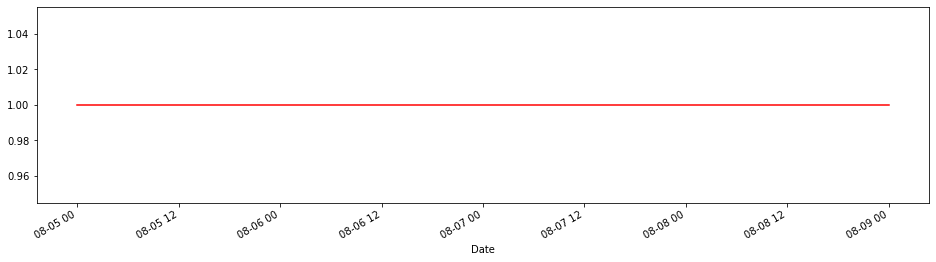

In [26]:
# Visualizando uma série temporal com a quantidade de tweets por data
time_len = pd.Series(tweets_per_date, index=data['Date'])
time_len.plot(figsize=(16, 4), color='r')

Criar um mapa de calor dos tweets utilizando a localização declarada pelos usuários

In [27]:
# Criando o objeto de localização
geolocator = Nominatim(user_agent="TweetSentiments")

# Coletando as coordenadas
latitude = []
longitude = []
for userLocation in tweets_df['UserLocation']:
    try:
        location = geolocator.geocode(userLocation)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

coordenadas = np.column_stack((latitude, longitude))

In [28]:
# Visualizando o mapa com as coordenadas dos tweets

# Criando a nomenclatura e local do arquivo a ser salvo
filename = 'desafio_modulo2_atividade2_mapa_calor.html'
path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
file_path = os.path.join(path, filename)

# Criando o mapa e destacando a localização dos tweets com um mapa de calor 
mapa = folium.Map(zoom_start=3.) #inicializando o zoom com 3x
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save(file_path)

# Apresentando o mapa
mapa

**Atividade 5:**

Utilizando Python e o pacote NLTK faça a mineração do texto das notícias lidas na atividade 4, que foram salvas no arquivo csv. Serão realizadas as seguintes tarefas de mineração:

- Remoção de Stopwords.
- Remoção de valores numéricos.
- Tokenização: dividir o texto em uma lista de tokens/palavras.
- Gerar bag of words (saco de palavras) dos tokens.

**Observação:** A mineração de texto será demonstrada na Segunda Aula Interativa.

In [29]:
# Importando as bibliotecas
import io #funções de manipulação de entrada e saída
import re #funções de limpeza de texto

from string import punctuation #funções de identificação de pontuação num texto

import nltk #funções de minetação de textos ou NLP
from nltk.tokenize import word_tokenize, sent_tokenize #funções de tokenização de um texto
from nltk.corpus import stopwords #funções de exclusão de stopwords de um texto

In [30]:
# Criando uma classe para formatar a função print()
class color:
   BLUE = '\033[94m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [31]:
# Buscando o arquivo de notícias para a leitura
filename = 'noticias2.txt'
path = os.path.join(os.getcwd(), "desafioModulo2GovBR") #diretório_atual/dados
file_path = os.path.join(path, filename)

try:        
    fileobject = open(file_path, "r", encoding='utf-8')

    if fileobject.mode == 'r':
        filecontents = fileobject.read()
        
    fileobject.close()

except FileNotFoundError:
       print(color.BOLD+color.RED+'\nERRO AO TENTAR LER O ARQUIVO !! \nO arquivo '+filename+' não existe!'+color.END)

In [32]:
# Apresentando o conteúdo do arquivo lido
print(f'{color.BOLD+color.BLUE}\nO conteúdo do arquivo {filename} é:\n{color.END}')
print(filecontents)


O conteúdo do arquivo noticias2.txt é:

Trabalhadores terão direito a uma parte do lucro obtido pelo Fundo de Garantia do Tempo de Serviço (FGTS) em 2019. A distribuição foi aprovada pelo Conselho Curador do FGTS em reunião na última terça-feira (8). No total, R$ 7,5 bilhões serão distribuídos de maneira proporcional ao saldo das contas e os depósitos devem ocorrer até 31 de agosto.De acordo com a Caixa Econômica Federal, a arrecadação do FGTS no ano passado foi de quase R$ 129 bilhões, vindos da contribuição de um milhão de empregados domésticos e de quatro milhões de empresas.O rendimento do depósito nas contas dos trabalhadores ficará em 4,9% ao ano, maior do que o que a caderneta de poupança proporciona atualmente. “Nós queremos mostrar especialmente para o trabalhador que não tem muito acesso ao mercado de capitais, a mercados financeiros pra aplicar os seus recursos, que manter o recurso no FGTS é uma alternativa interessante”, afirma Gustavo Alves Tillmann, diretor do Departame

In [33]:
# Quebrando o texto em sentenças
sentencas = sent_tokenize(filecontents) # caso dê erro, executar o seguinte comando: nltk.download('punkt')
print(sentencas)

['Trabalhadores terão direito a uma parte do lucro obtido pelo Fundo de Garantia do Tempo de Serviço (FGTS) em 2019.', 'A distribuição foi aprovada pelo Conselho Curador do FGTS em reunião na última terça-feira (8).', 'No total, R$ 7,5 bilhões serão distribuídos de maneira proporcional ao saldo das contas e os depósitos devem ocorrer até 31 de agosto.De acordo com a Caixa Econômica Federal, a arrecadação do FGTS no ano passado foi de quase R$ 129 bilhões, vindos da contribuição de um milhão de empregados domésticos e de quatro milhões de empresas.O rendimento do depósito nas contas dos trabalhadores ficará em 4,9% ao ano, maior do que o que a caderneta de poupança proporciona atualmente.', '“Nós queremos mostrar especialmente para o trabalhador que não tem muito acesso ao mercado de capitais, a mercados financeiros pra aplicar os seus recursos, que manter o recurso no FGTS é uma alternativa interessante”, afirma Gustavo Alves Tillmann, diretor do Departamento de Gestão de Fundos do Min

In [34]:
# Quebrando as sentenças em palavras
palavras = word_tokenize(filecontents.lower())
print(palavras)

['trabalhadores', 'terão', 'direito', 'a', 'uma', 'parte', 'do', 'lucro', 'obtido', 'pelo', 'fundo', 'de', 'garantia', 'do', 'tempo', 'de', 'serviço', '(', 'fgts', ')', 'em', '2019.', 'a', 'distribuição', 'foi', 'aprovada', 'pelo', 'conselho', 'curador', 'do', 'fgts', 'em', 'reunião', 'na', 'última', 'terça-feira', '(', '8', ')', '.', 'no', 'total', ',', 'r', '$', '7,5', 'bilhões', 'serão', 'distribuídos', 'de', 'maneira', 'proporcional', 'ao', 'saldo', 'das', 'contas', 'e', 'os', 'depósitos', 'devem', 'ocorrer', 'até', '31', 'de', 'agosto.de', 'acordo', 'com', 'a', 'caixa', 'econômica', 'federal', ',', 'a', 'arrecadação', 'do', 'fgts', 'no', 'ano', 'passado', 'foi', 'de', 'quase', 'r', '$', '129', 'bilhões', ',', 'vindos', 'da', 'contribuição', 'de', 'um', 'milhão', 'de', 'empregados', 'domésticos', 'e', 'de', 'quatro', 'milhões', 'de', 'empresas.o', 'rendimento', 'do', 'depósito', 'nas', 'contas', 'dos', 'trabalhadores', 'ficará', 'em', '4,9', '%', 'ao', 'ano', ',', 'maior', 'do', 'q

In [35]:
# Removendo caracteres desnecessários para a análise

# Removendo hashtags
filecontents = re.sub(r'#\S+', '', filecontents)

# Removendo mentions ou menções
filecontents = re.sub(r'@\S+', '', filecontents)

# Removendo stock market tickers like $GE
filecontents = re.sub(r'\$\w*', '', filecontents)

# Removendo hyperlinks
filecontents = re.sub(r'https?:\/\/.*[\r\n]*', '', filecontents)

# Removendo números
filecontents = re.sub('[0-9]+', '', filecontents)

# Removendo hashtags
filecontents = re.sub(r'\ufeff', '', filecontents)

# Removendo quebras de linha (\n)
filecontents = re.sub(r'\n', '', filecontents)

# Removendo \xa0
filecontents = re.sub(r'\xa0', '', filecontents)

# Removendo crases
filecontents = re.sub(r'``', '', filecontents)

In [36]:
# Apresentando texto após limpeza
filecontents

'Trabalhadores terão direito a uma parte do lucro obtido pelo Fundo de Garantia do Tempo de Serviço (FGTS) em . A distribuição foi aprovada pelo Conselho Curador do FGTS em reunião na última terça-feira (). No total, R , bilhões serão distribuídos de maneira proporcional ao saldo das contas e os depósitos devem ocorrer até  de agosto.De acordo com a Caixa Econômica Federal, a arrecadação do FGTS no ano passado foi de quase R  bilhões, vindos da contribuição de um milhão de empregados domésticos e de quatro milhões de empresas.O rendimento do depósito nas contas dos trabalhadores ficará em ,% ao ano, maior do que o que a caderneta de poupança proporciona atualmente. “Nós queremos mostrar especialmente para o trabalhador que não tem muito acesso ao mercado de capitais, a mercados financeiros pra aplicar os seus recursos, que manter o recurso no FGTS é uma alternativa interessante”, afirma Gustavo Alves Tillmann, diretor do Departamento de Gestão de Fundos do Ministério da Economia.O FGTS

In [37]:
# Transformando as palavras em tokens
palavras = word_tokenize(filecontents.lower())
print(palavras)

['trabalhadores', 'terão', 'direito', 'a', 'uma', 'parte', 'do', 'lucro', 'obtido', 'pelo', 'fundo', 'de', 'garantia', 'do', 'tempo', 'de', 'serviço', '(', 'fgts', ')', 'em', '.', 'a', 'distribuição', 'foi', 'aprovada', 'pelo', 'conselho', 'curador', 'do', 'fgts', 'em', 'reunião', 'na', 'última', 'terça-feira', '(', ')', '.', 'no', 'total', ',', 'r', ',', 'bilhões', 'serão', 'distribuídos', 'de', 'maneira', 'proporcional', 'ao', 'saldo', 'das', 'contas', 'e', 'os', 'depósitos', 'devem', 'ocorrer', 'até', 'de', 'agosto.de', 'acordo', 'com', 'a', 'caixa', 'econômica', 'federal', ',', 'a', 'arrecadação', 'do', 'fgts', 'no', 'ano', 'passado', 'foi', 'de', 'quase', 'r', 'bilhões', ',', 'vindos', 'da', 'contribuição', 'de', 'um', 'milhão', 'de', 'empregados', 'domésticos', 'e', 'de', 'quatro', 'milhões', 'de', 'empresas.o', 'rendimento', 'do', 'depósito', 'nas', 'contas', 'dos', 'trabalhadores', 'ficará', 'em', ',', '%', 'ao', 'ano', ',', 'maior', 'do', 'que', 'o', 'que', 'a', 'caderneta', '

In [38]:
# Buscando os stopwords da língua portuguesa
stopwords = set(nltk.corpus.stopwords.words('portuguese') + list(punctuation)) # caso dê erro, executar o seguinte comando: nltk.download('stopwords')
print(stopwords)

{'sou', 'são', 'foi', 'tivermos', 'para', 'tenho', 'seremos', 'eu', 'tenhamos', 'tiver', '<', 'nós', 'dos', 'lhes', '|', 'fosse', 'serei', 'meu', 'haja', 'elas', '~', 'fôssemos', ']', 'tínhamos', 'estamos', 'houvemos', 'aos', 'teremos', 'estivéramos', 'te', ')', 'houverei', 'deles', 'forem', 'tenham', 'for', 'estejamos', '*', 'houveríamos', 'uma', 'pelos', 'mas', 'fossem', 'em', '>', 'estávamos', 'que', 'os', 'estou', 'isso', 'vos', '`', 'houvermos', 'a', 'estivermos', 'houver', 'estivera', ';', 'se', 'me', 'estejam', 'hão', 'depois', 'das', 'estivemos', 'no', 'houvesse', '\\', 'aquelas', 'estivessem', 'éramos', 'seja', 'estava', 'isto', 'quem', '(', 'essas', 'ao', 'tivéramos', 'houve', '[', 'nossa', 'minha', 'aquele', 'houvera', 'será', 'havemos', 'houveremos', '?', '@', 'você', '!', 'estão', 'sem', 'nossos', 'delas', 'num', 'tinha', 'temos', 'há', 'ele', 'como', 'tuas', 'estivesse', 'teve', '$', 'está', 'e', 'vocês', 'era', 'essa', 'muito', 'pelo', 'ela', 'da', 'nos', 'com', 'ou', 'l

In [39]:
# Removendo as stopwords coletadas dos tokens criados
palavrasLimpas = [palavra for palavra in palavras if palavra not in stopwords]
print(palavrasLimpas)

['trabalhadores', 'direito', 'parte', 'lucro', 'obtido', 'fundo', 'garantia', 'tempo', 'serviço', 'fgts', 'distribuição', 'aprovada', 'conselho', 'curador', 'fgts', 'reunião', 'última', 'terça-feira', 'total', 'r', 'bilhões', 'distribuídos', 'maneira', 'proporcional', 'saldo', 'contas', 'depósitos', 'devem', 'ocorrer', 'agosto.de', 'acordo', 'caixa', 'econômica', 'federal', 'arrecadação', 'fgts', 'ano', 'passado', 'quase', 'r', 'bilhões', 'vindos', 'contribuição', 'milhão', 'empregados', 'domésticos', 'quatro', 'milhões', 'empresas.o', 'rendimento', 'depósito', 'contas', 'trabalhadores', 'ficará', 'ano', 'maior', 'caderneta', 'poupança', 'proporciona', 'atualmente', '“', 'queremos', 'mostrar', 'especialmente', 'trabalhador', 'acesso', 'mercado', 'capitais', 'mercados', 'financeiros', 'pra', 'aplicar', 'recursos', 'manter', 'recurso', 'fgts', 'alternativa', 'interessante', '”', 'afirma', 'gustavo', 'alves', 'tillmann', 'diretor', 'departamento', 'gestão', 'fundos', 'ministério', 'econom

In [40]:
# Juntando as palavras limpas para apresentá-las numa nuvem
palavrasLimpasJuntas = " ".join(palavrasLimpas)
print(palavrasLimpasJuntas)

trabalhadores direito parte lucro obtido fundo garantia tempo serviço fgts distribuição aprovada conselho curador fgts reunião última terça-feira total r bilhões distribuídos maneira proporcional saldo contas depósitos devem ocorrer agosto.de acordo caixa econômica federal arrecadação fgts ano passado quase r bilhões vindos contribuição milhão empregados domésticos quatro milhões empresas.o rendimento depósito contas trabalhadores ficará ano maior caderneta poupança proporciona atualmente “ queremos mostrar especialmente trabalhador acesso mercado capitais mercados financeiros pra aplicar recursos manter recurso fgts alternativa interessante ” afirma gustavo alves tillmann diretor departamento gestão fundos ministério economia.o fgts auxilia trabalhadores casos demissão doenças graves aposentaria fundo serve financiamento obras habitação saneamento infraestrutura valor depositado juntamente juros atualização monetária obrigatórios.o brasil enviou nesta quarta-feira missão especial assi

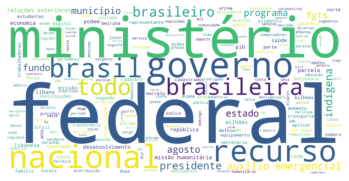

In [41]:
# Visualizando uma nuvem de palavras com todos os tokens limpos

wc = WordCloud(min_font_size=10, 
               max_font_size=500, 
               background_color='white', 
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(palavrasLimpasJuntas)

# Criando a nomenclatura e local do arquivo a ser salvo
filename = 'desafio_modulo2_atividade5_nuvem_palavras_1.png'
path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
file_path = os.path.join(path, filename)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(file_path, dpi=300)
plt.show()

In [42]:
# Criando uma lista de stopwords manualmente
new_stopwords = []

# Adicionar palavras ao stopwords
new_stopwords.append('todo')
new_stopwords.append('todos')
new_stopwords.append('pa')
new_stopwords.append('marajó')

print(new_stopwords)

['todo', 'todos', 'pa', 'marajó']


In [43]:
# Adicionando palavras ao stopwords manualmente (identificadas visualmente)
stopwords = set(nltk.corpus.stopwords.words('portuguese') + list(punctuation) + new_stopwords)
print(stopwords)

{'sou', 'são', 'foi', 'tivermos', 'para', 'tenho', 'seremos', 'eu', 'tenhamos', 'tiver', '<', 'nós', 'dos', 'lhes', '|', 'fosse', 'serei', 'meu', 'haja', 'pa', 'elas', '~', 'fôssemos', ']', 'tínhamos', 'estamos', 'houvemos', 'aos', 'teremos', 'estivéramos', 'te', ')', 'houverei', 'deles', 'forem', 'tenham', 'for', 'estejamos', '*', 'houveríamos', 'uma', 'pelos', 'mas', 'fossem', 'em', '>', 'estávamos', 'que', 'os', 'estou', 'isso', 'vos', '`', 'houvermos', 'a', 'estivermos', 'houver', 'estivera', ';', 'se', 'me', 'estejam', 'hão', 'depois', 'das', 'estivemos', 'no', 'houvesse', '\\', 'aquelas', 'estivessem', 'éramos', 'seja', 'estava', 'isto', 'quem', '(', 'essas', 'ao', 'tivéramos', 'houve', '[', 'nossa', 'minha', 'aquele', 'houvera', 'será', 'havemos', 'houveremos', '?', '@', 'você', '!', 'estão', 'sem', 'nossos', 'delas', 'num', 'tinha', 'temos', 'há', 'todos', 'ele', 'como', 'tuas', 'estivesse', 'teve', '$', 'está', 'e', 'vocês', 'era', 'essa', 'muito', 'pelo', 'ela', 'da', 'nos', 

In [44]:
# Removendo novamente
palavrasLimpas = [palavra for palavra in palavras if palavra not in stopwords]
print(palavrasLimpas)

['trabalhadores', 'direito', 'parte', 'lucro', 'obtido', 'fundo', 'garantia', 'tempo', 'serviço', 'fgts', 'distribuição', 'aprovada', 'conselho', 'curador', 'fgts', 'reunião', 'última', 'terça-feira', 'total', 'r', 'bilhões', 'distribuídos', 'maneira', 'proporcional', 'saldo', 'contas', 'depósitos', 'devem', 'ocorrer', 'agosto.de', 'acordo', 'caixa', 'econômica', 'federal', 'arrecadação', 'fgts', 'ano', 'passado', 'quase', 'r', 'bilhões', 'vindos', 'contribuição', 'milhão', 'empregados', 'domésticos', 'quatro', 'milhões', 'empresas.o', 'rendimento', 'depósito', 'contas', 'trabalhadores', 'ficará', 'ano', 'maior', 'caderneta', 'poupança', 'proporciona', 'atualmente', '“', 'queremos', 'mostrar', 'especialmente', 'trabalhador', 'acesso', 'mercado', 'capitais', 'mercados', 'financeiros', 'pra', 'aplicar', 'recursos', 'manter', 'recurso', 'fgts', 'alternativa', 'interessante', '”', 'afirma', 'gustavo', 'alves', 'tillmann', 'diretor', 'departamento', 'gestão', 'fundos', 'ministério', 'econom

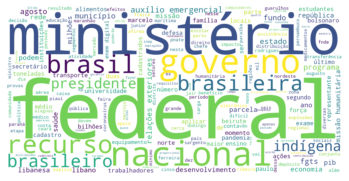

In [45]:
# Visualizando novamente numa nuvem de palavras
palavrasLimpasJuntas = " ".join(palavrasLimpas)

wc = WordCloud(min_font_size=10, 
               max_font_size=500, 
               background_color='white', 
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(palavrasLimpasJuntas)

# Criando a nomenclatura e local do arquivo a ser salvo
filename = 'desafio_modulo2_atividade5_nuvem_palavras_2.png'
path = os.path.join(os.getcwd(), "dados") #diretório_atual/dados
file_path = os.path.join(path, filename)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(file_path, dpi=300)
plt.show()